In [1]:
# HTML code to toggle code cell visibility
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/
jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="
javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

---

<h1 style="color:#ff0090">Phil the Gaps: Unraveling the Hidden Threads of the Philippines' 2022 Trade Network</h1>

---

*DASCI 272 - Network Science*

*Prepared by Erika G. Lacson*

#### Import Libraries and Packages

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.layout import multipartite_layout
import random

In [4]:
# colors
c_pink = 'ff0090'
c_green = '#04fc6c'
c_blue = '#0418fc'

# Display float values without scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

--- 
<a id='Intro'></a>
<h1 style="color:#0494fc; background-color:#ffe6f4; border: 1px solid #ffffff; padding: 10px 0;">INTRODUCTION</h1>

Diving into Network Science, my latest academic pursuit, a familiar sensation was rekindled. Recalling a project from three terms ago — a project I'd vowed to revisit — I found myself drawn back to the Bureau of Customs' trade data from 2015 to 2022. That itch, the compulsion to delve deeper and try a different method in uncovering insights into the Philippines' trade patterns, was back. My interest in using novel techniques to uncover patterns, reminiscent of my previous experiment with Benford's Law, spurred me to view the Philippines Trade data through a fresh lens. Given the recent political shifts, emerging leadership, and the inception of transformative laws like the Rice Tariffication, the Filipino trade landscape is continuously evolving, offering new avenues for insights. It's personal to me: understanding this complex web isn't just about data — it's about the stories, opportunities, and the intrinsic value I derive from such projects.

So, why the sudden interest in Network Science? Well, it offers a fresh lens, a new perspective. While on the surface it might seem like merely studying relationships and connections, this field has already proven instrumental in addressing and modelling some of our most complex challenges. No matter how chaotic they may appear, solutions become attainable with Network Science.

Since Network Science is most useful when we have specific goals or problems to solve in mind, in this exploration, I aim to answer the following questions:

1. How does the Philippines  connect and interact with its trade partners, and what does this mean for our country's future alliances and opportunities? 
2. By dissecting most traded products, can we pinpoint untapped opportunities or foresee emerging trends?

Join me as we chart this journey, filling the gaps in the untapped opportunities and trends in the Philippines' 2022 trade network.

--- 
<a id='Basics'></a>
<h1 style="color:#0494fc; background-color:#ffe6f4; border: 1px solid #ffffff; padding: 10px 0;">BACKGROUND AND BASICS</h1>

Before we begin with our analysis, let me give you a simple refresher about the dataset and the key concepts that we'll discuss later.

<b>Data Source</b>:
The data has been sourced from [Comtradeplus](https://comtradeplus.un.org/), a renowned repository for global trade data. A key term that will frequently pop up in our dataset is the 'HS Codes'. These Harmonized System (HS) codes, further detailed [here](https://tariffcommission.gov.ph/tariff-book), serve as international identification codes for traded goods, ensuring a standardized classification across borders.

<b>Key Terms</b>:

- <b>Nodes and Degrees</b>:

At its core, Network Science revolves around 'nodes' and 'degrees'. 
In this study, <b>Nodes</b> may represent countries or product categories. Their interactions or relationships are signified by <b>edges or links</b>. 

The <b>degree</b>? It's a simple count of how many links a node has. For instance, if the Philippines (a node) trades with ten countries, its degree is ten.

<b>Bipartite & Tripartite Networks</b>:
The terms 'bipartite' and 'tripartite' might sound like jargon, but they're quite straightforward. Think of them as layers in a network. A <b>bipartite network</b> has two sets of nodes, like countries and products. Edges link nodes from one set to another but never within the same set. 
On the other hand, a <b>tripartite network</b> has three node sets, increasing the complexity and richness of the data.

Armed with these basics, let's continue with our analysis.

--- 
<a id='Network'></a>
<h1 style="color:#0494fc; background-color:#ffe6f4; border: 1px solid #ffffff; padding: 10px 0;">NETWORK REPRESENTATION</h1>

The following summarizes my representation of this trade network:

<b><span style="color:#0494fc">NODES:</span></b>
- <b><span style="color:#ff0000">Reporter Country</span></b> - includes Philippines only, as I only want to analyze using the Philippines' point of view.
- <b><span style="color:#0418fc">Partner Countries</span></b> - includes partner countries with which the Philippines conducts import / export trade activities.
- <b><span style="color:#ff0090">Chapter</span></b> - represents product categories based on Harmonized System (HS) code. These are identification codes assigned to goods that are traded and recognized internationally.

<b><span style="color:#0494fc">EDGES:</span></b>
- Edges between the <b><span style="color:#ff0000">Reporter Country</span></b> and <b><span style="color:#0418fc">Partner Countries</span></b> represent trade interactions (imports and exports) weighted based on trade value in USD.
- Edges between <b><span style="color:#ff0000">Reporter Country</span></b> and <b><span style="color:#ff0090">Chapters</span></b> represent traded product categories (imported and exported product categories) weighted based on trade value in USD.

<b><span style="color:#0494fc">NETWORK TYPE:</span></b>
- This network will be a <b>directed</b> [the direction of the edges will represent the <i>imports</i> (pointing to the Philippines) and <i>exports</i> (pointing out of the Philippines), <b>weighted</b> (based on trade value in USD)], and <b>tripartite graph</b> (3 different nodes above, 1 same edge attribute based on trade value in USD).
</br>

--- 
<a id='Network'></a>
<h1 style="color:#0494fc; background-color:#ffe6f4; border: 1px solid #ffffff; padding: 10px 0;">ANALYSIS</h1>

Before we begin with our analysis, let's load the data and prepare it for network analysis. 

In [5]:
def load_and_preprocess_data(filepath):    
    # Load the data
    df = pd.read_excel(filepath, header=0)
    
    # Update the data type of relevant columns
    df['HSCode'] = df['HSCode'].astype('object')
    df['Trade_Value_USD'] = df['Trade_Value_USD'].astype(float)
    
    # Check for missing rows (No missing rows) 
    missing_values = df.isna().sum().sum()
    display(HTML(f'<b>Number of missing values: {missing_values}\n</b>'))

    # Display the data types
    display(HTML(f'<b>Display data info:</b>'))
    display(df.info())

    # Display the data statistics
    display(HTML(f'<b>Display data statistics:</b>'))
    display(df.describe());

    return df

In [104]:
df = load_and_preprocess_data('PH_trades_2022.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10420 entries, 0 to 10419
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReporterISO      10420 non-null  object 
 1   ReporterDesc     10420 non-null  object 
 2   FlowDesc         10420 non-null  object 
 3   PartnerISO       10420 non-null  object 
 4   PartnerDesc      10420 non-null  object 
 5   HSCode           10420 non-null  object 
 6   Chapter          10420 non-null  object 
 7   Trade_Value_USD  10420 non-null  float64
dtypes: float64(1), object(7)
memory usage: 651.4+ KB


None

Trade_Value_USD
count        10,420.00
mean     21,574,715.44
std     218,823,858.64
min              25.00
25%           4,933.00
50%          86,302.00
75%       1,319,737.25
max   9,022,178,907.00

There are no missing values, data types are updated, and the trade values range from USD 25 to 9,022,178,907. Now that the data is clean and ready, we can proceed creating and visualizing the network. 

---

<h2 style="color:#0494fc; font-size:26px;">Network Creation and Visualization</h2>

We'll be using NetworkX library to represent our network. We'll start by creating a directed graph and adding the nodes and edges based on our `df` dataframe.

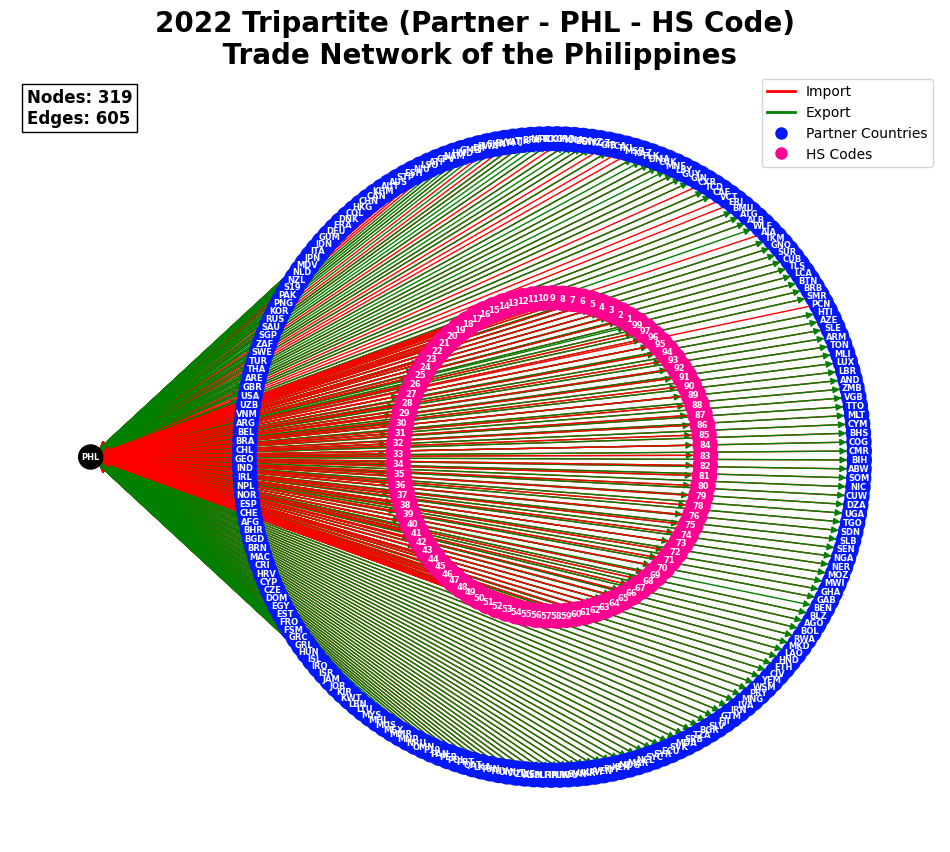

In [192]:
# Initialize a directed graph
G = nx.DiGraph()

# Add nodes
partner = df['PartnerISO'].unique()
reporter = df['ReporterISO'].unique()
chapter = df['HSCode'].unique()

G.add_nodes_from(partner, bipartite=0)
G.add_nodes_from(reporter, bipartite=1)
G.add_nodes_from(chapter, bipartite=2)

# Add edges
edges = []
for _, row in df.iterrows():
    if row['FlowDesc'] == 'Export':
        edges.append((row['ReporterISO'], row['PartnerISO'], {"weight": row['Trade_Value_USD'], "flow": "Export"}))
        edges.append((row['ReporterISO'], row['HSCode'], {"weight": row['Trade_Value_USD'], "flow": "Export"}))
    else:  # Import
        edges.append((row['PartnerISO'], row['ReporterISO'], {"weight": row['Trade_Value_USD'], "flow": "Import"}))
        edges.append((row['HSCode'], row['ReporterISO'], {"weight": row['Trade_Value_USD'], "flow": "Import"}))
G.add_edges_from(edges)

# Assign colors for edges based on the flow direction
edge_colors = ['green' if G[u][v]['flow'] == 'Export' else 'red' for u, v in G.edges()]

# Initialize color list
colors = []

# Assign colors for nodes
for node in G.nodes():
    if G.nodes[node]['bipartite'] == 0:  # partner nodes
        colors.append('#0418fc')
    elif G.nodes[node]['bipartite'] == 1:  # reporter nodes
        colors.append('#000000')
    else:  # chapter nodes
        colors.append('#ff0090')

# Visualization options
options = {
    "node_color": colors,
    "edge_color": edge_colors,
    "font_color": 'white',
    "with_labels": True,
    'font_size':6,
    'font_weight':'bold'
}

# Define the shell layout with three layers: PHL, partner countries, and chapters
shell_pos = nx.shell_layout(G, [list(chapter), list(partner), list(reporter)])

# Draw the graph using the shell layout with annotations
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(G, shell_pos, **options, ax=ax)

# Annotation
annotation_text = "Nodes: 319\nEdges: 605"
ax.annotate(annotation_text, xy=(0, 1), xytext=(12, -12), va='top',
           xycoords='axes fraction', textcoords='offset points',
           fontweight='bold', fontsize=12, bbox=dict(boxstyle="square", fc="white"))


# Legend for edge colors and node groups
import_patch = plt.Line2D([0], [0], color="red", lw=2, label="Import")
export_patch = plt.Line2D([0], [0], color="green", lw=2, label="Export")
partner_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0418fc', markersize=10, label='Partner Countries')
hscode_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff0090', markersize=10, label='HS Codes')
plt.legend(handles=[import_patch, export_patch, partner_patch, hscode_patch])

plt.title("2022 Tripartite (Partner - PHL - HS Code)\n Trade Network of the Philippines",
         fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

Figure 1 illustrates the import and export transactions between the Philippines, its 221 global partners, and the 97 diverse product categories for 2022.

In [8]:
def network_stats(G, directed=True):
    """Printouts key Network Statistics."""
    # Network Statistics
    N = G.order()
    L = G.size()
    
    if directed:
        avg_deg = float(L) / N # if directed network
    else:
        avg_deg = 2*float(L) / N # if undirected network

    display(HTML(f'<b>Network Statistics:</b>'))
    print(f'    Nodes:          {N}')
    print(f'    Edges:          {L}')
    print(f'    Average degree: {avg_deg:.6f}')

G_eda = network_stats(G, directed=True)   

    Nodes:          319
    Edges:          605
    Average degree: 1.896552


In [9]:
# Network Density
density = nx.density(G)
print(f"Network Density: {density:.6f}") # Sparse; connectivity isnt the priority here

Network Density: 0.005964


In [10]:
# Degree Distribution
# Not applicable as the max incoming and outgoing edges = 1

In [11]:
# Paths and pathology 
# Not applicable as this requires the graph to be strongly connected

In [12]:
# Not applicable as everything only interacts with PHL
clustering_coefficients = nx.clustering(G)
avg_clustering_coeff = sum(clustering_coefficients.values()) / len(G)
print(f"Average Clustering Coefficient: {avg_clustering_coeff:.6f}")

Average Clustering Coefficient: 0.000000


In [13]:
is_strongly_connected = nx.is_strongly_connected(G)
print(f"Is the network strongly connected? {is_strongly_connected}")
# As expected

Is the network strongly connected? False


### Analyze Bipartite Networks separately

#### 1. PHL - Partner Bipartite Network

While our tripartite network gives a broad perspective, it's equally vital to focus on more granular relationships. Let's pivot our focus into the bipartite networks, beginning with the PHL-Partner Bipartite Network.

In [207]:
df_partners = (df
               .copy()
               .drop(columns=['HSCode', 'Chapter'])
               .groupby(['FlowDesc', 'ReporterISO', 'PartnerISO', 'PartnerDesc'])
               .sum('Trade_Value_USD')
               .reset_index()
               .sort_values(by='Trade_Value_USD', ascending=False))

In [209]:
top_10_export_partners = df_partners[df_partners['FlowDesc']=='Export'][:10]
top_10_export_partners

FlowDesc ReporterISO PartnerISO           PartnerDesc   Trade_Value_USD
192   Export         PHL        USA                   USA 12,476,937,774.00
94    Export         PHL        JPN                 Japan 11,094,093,997.00
36    Export         PHL        CHN                 China 10,965,840,327.00
78    Export         PHL        HKG  China, Hong Kong SAR 10,478,978,952.00
160   Export         PHL        SGP             Singapore  4,908,819,055.00
178   Export         PHL        THA              Thailand  3,374,362,655.00
101   Export         PHL        KOR         Rep. of Korea  3,127,015,016.00
156   Export         PHL        S19       Other Asia, nes  2,964,904,071.00
136   Export         PHL        NLD           Netherlands  2,941,094,285.00
48    Export         PHL        DEU               Germany  2,779,331,334.00

In [208]:
top_10_import_partners = df_partners[df_partners['FlowDesc']=='Import'][:10]
top_10_import_partners

FlowDesc ReporterISO PartnerISO      PartnerDesc   Trade_Value_USD
239   Import         PHL        CHN            China 29,796,347,043.00
289   Import         PHL        IDN        Indonesia 13,935,821,577.00
299   Import         PHL        JPN            Japan 13,086,141,586.00
306   Import         PHL        KOR    Rep. of Korea 12,730,035,481.00
399   Import         PHL        USA              USA  9,690,554,318.00
365   Import         PHL        SGP        Singapore  8,460,571,951.00
384   Import         PHL        THA         Thailand  7,656,411,913.00
361   Import         PHL        S19  Other Asia, nes  7,093,880,315.00
335   Import         PHL        MYS         Malaysia  6,680,522,080.00
405   Import         PHL        VNM         Viet Nam  4,773,472,579.00

In [18]:
# Bipartite Network for df_partners

# EXPORTS
exports_G = nx.DiGraph()
exports_G.add_node('PHL', bipartite=0)
exports_G.add_nodes_from(df_partners[df_partners['FlowDesc'] == 'Export']['PartnerISO'].unique(), bipartite=1)
for _, row in df_partners[df_partners['FlowDesc'] == 'Export'].iterrows():
    exports_G.add_edge('PHL', row['PartnerISO'], weight=row['Trade_Value_USD'])

# IMPORTS
imports_G = nx.DiGraph()
imports_G.add_node('PHL', bipartite=0)
imports_G.add_nodes_from(df_partners[df_partners['FlowDesc'] == 'Import']['PartnerISO'].unique(), bipartite=1)
for _, row in df_partners[df_partners['FlowDesc'] == 'Import'].iterrows():
    imports_G.add_edge(row['PartnerISO'], 'PHL', weight=row['Trade_Value_USD'])

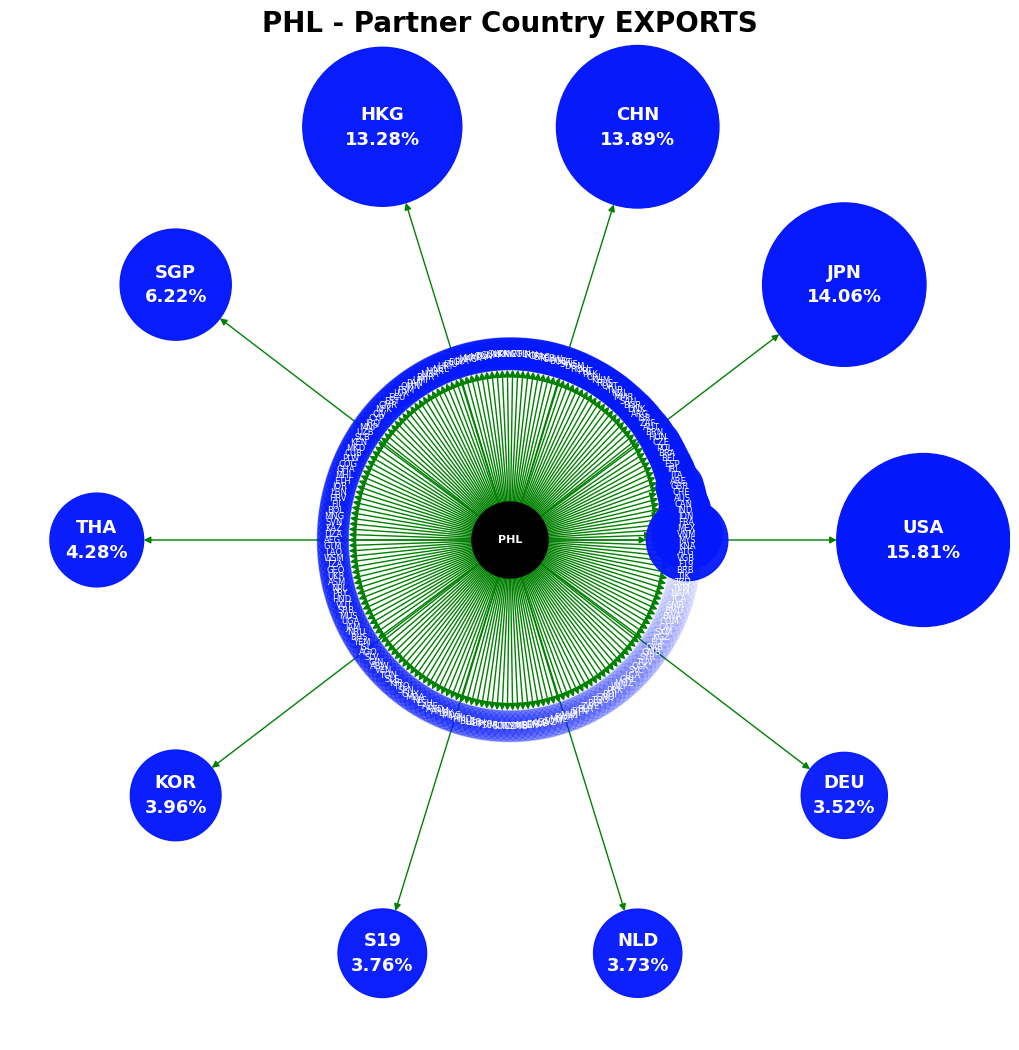

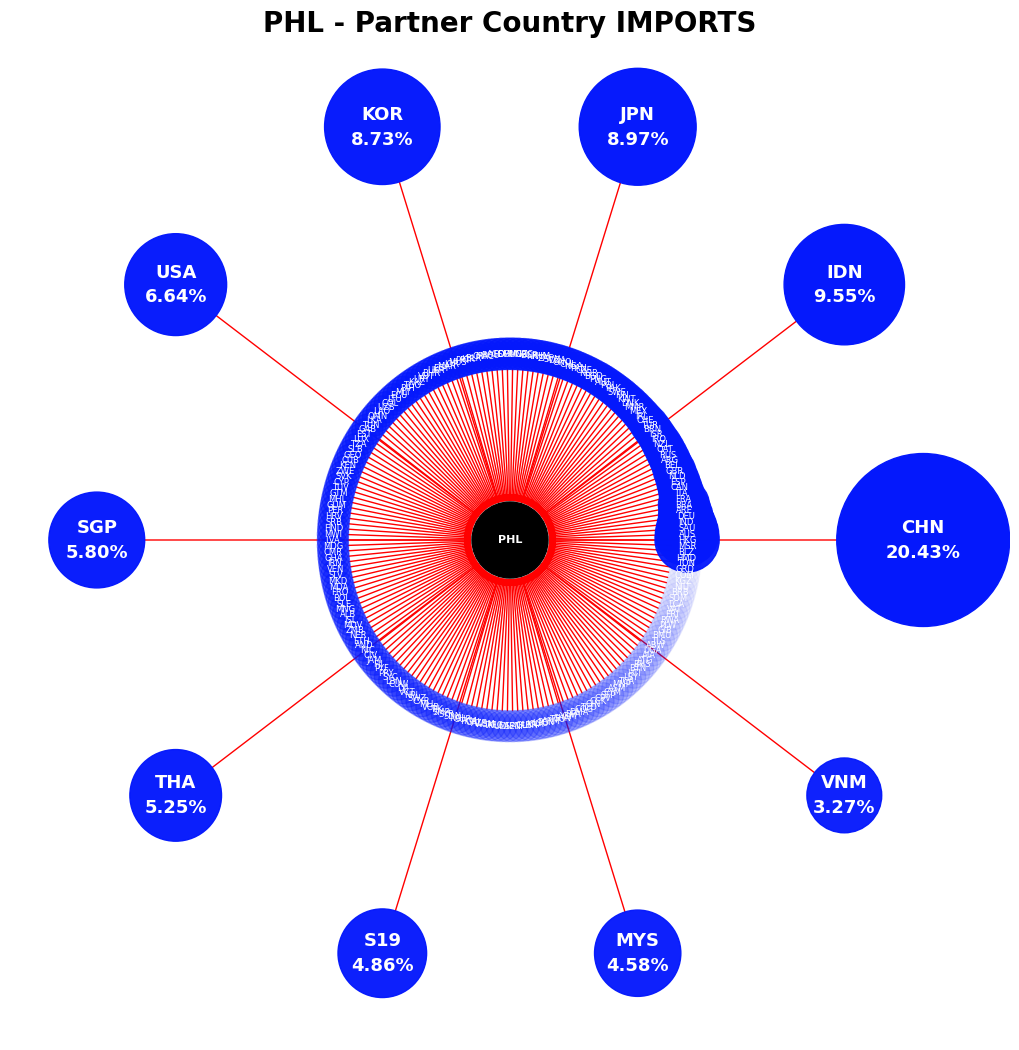

In [20]:
def visualize_bipartite_digraph_partners(graph, title, flow_desc):
    total_trade_value = df_partners[df_partners['FlowDesc'] == flow_desc]['Trade_Value_USD'].sum()
    
    # Extract top 10 partners by trade value
    top_10_partners = df_partners[df_partners['FlowDesc'] == flow_desc].nlargest(10, 'Trade_Value_USD')['PartnerISO'].tolist()
    top_10_values = df_partners[df_partners['FlowDesc'] == flow_desc].nlargest(10, 'Trade_Value_USD')['Trade_Value_USD'].tolist()

    # Convert values to percentage over total trade
    top_10_percentage = [(value / total_trade_value) * 100 for value in top_10_values]

    # Fixed positions for top 10 partners
    fixed_positions = {'PHL': (0, 0)}
    angle = np.linspace(0, 2 * np.pi, len(top_10_partners) + 1)
    radius_outer = 0.7  # Outer radius for top 10
    radius_inner = 0.3  # Inner radius for other nodes
    
    for idx, partner in enumerate(top_10_partners):
        fixed_positions[partner] = (radius_outer * np.cos(angle[idx]), radius_outer * np.sin(angle[idx]))
    
    # Positioning other nodes (not in top 10) in inner circle
    other_partners = [node for node in graph.nodes() if node not in top_10_partners and node != 'PHL']
    angle_inner = np.linspace(0, 2 * np.pi, len(other_partners) + 1)
    for idx, partner in enumerate(other_partners):
        fixed_positions[partner] = (radius_inner * np.cos(angle_inner[idx]), radius_inner * np.sin(angle_inner[idx]))
    
    fixed_nodes = list(fixed_positions.keys())
    pos = nx.spring_layout(graph, pos=fixed_positions, fixed=fixed_nodes, seed=143, k=0.2)
    
    # Weights for node sizes
    trade_values = [graph[u][v]['weight'] for u, v in graph.edges()]
    max_trade_value = max(trade_values)
    node_sizes = [3000]  # Fixed size for PHL
    node_sizes.extend([500 + 15000 * (value / max_trade_value) for value in trade_values])
    
    # Edge colors
    edge_colors = ['green' if u == 'PHL' else 'red' for u, v in graph.edges()]
    
    # Node colors - Fade in descending order of trade value using alpha
    sorted_trade_values = sorted(trade_values, reverse=False)
    base_color = np.array([4/255, 24/255, 252/255, 1])  # RGB for #0418fc
    node_colors = ['#000000']  # PHL
    for _, _, weight in graph.edges(data='weight'):
        index = sorted_trade_values.index(weight)
        alpha = (index + 1) / len(sorted_trade_values)
        faded_color = tuple(base_color * [1, 1, 1, alpha])
        node_colors.append(faded_color)
    
    # Visualization options
    options = {
        "node_color": node_colors,
        "edge_color": edge_colors,
        "node_size": node_sizes,
        "font_color": 'white',
        "with_labels": False,
        'font_size': 6,
        'font_weight': 'bold',
        'width': 1
    }
    
    # Draw the graph
    plt.figure(figsize=(10, 10))
    nx.draw(graph, pos, **options)

    # Add labels with percentage values and PartnerISO inside the nodes for top 10 partners
    for idx, partner in enumerate(top_10_partners):
        plt.text(pos[partner][0], pos[partner][1] + 0.02, f"{partner}", ha='center', va='center', color='white', fontsize=13, fontweight='bold')
        plt.text(pos[partner][0], pos[partner][1] - 0.02, f"{top_10_percentage[idx]:.2f}%", ha='center', va='center', color='white', fontsize=13, fontweight='bold')
    
#     # Add labels with trade values (in millions) and PartnerISO inside the nodes for top 10 partners
#     for idx, partner in enumerate(top_10_partners):
#         plt.text(pos[partner][0], pos[partner][1] + 0.02, f"{partner}", ha='center', va='center', color='white', fontsize=13, fontweight='bold')
#         plt.text(pos[partner][0], pos[partner][1] - 0.02, f"{top_10_values_billions[idx]:,.2f}B", ha='center', va='center', color='white', fontsize=13, fontweight='bold')
    
    # Label other nodes (not in top 10)
    for partner in other_partners:
        plt.text(pos[partner][0], pos[partner][1], f"{partner}", ha='center', va='center', color='white', fontsize=6)

    # Always label PHL
    plt.text(pos['PHL'][0], pos['PHL'][1], "PHL", ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    
    plt.title(title, fontdict={'fontsize':20, 'fontweight':'bold'})
    plt.show()

# Visualization for EXPORTS with switched positions for top 10 and other nodes, alpha-faded colors, trade values (in millions), and PartnerISO inside nodes
visualize_bipartite_digraph_partners(exports_G, "PHL - Partner Country EXPORTS", "Export")

# Visualization for IMPORTS with switched positions for top 10 and other nodes, alpha-faded colors, trade values (in millions), and PartnerISO inside nodes
visualize_bipartite_digraph_partners(imports_G, "PHL - Partner Country IMPORTS", "Import")


Figure 2 uncovers the USA and Japan as the leading trade partners for the Philippines, spotlighting a balanced trade synergy. The prominence of Asian nations, including China and the ASEAN members, points towards a potentially strengthening regional bond, perhaps influenced by ASEAN collaborations as well as their proximity to the our country. Meanwhile, the Philippines' global outreach is also evident, with European nations like the Netherlands and Germany making it to the top 10. This diverse set of relationships not only highlights the breadth of the Philippines' trade arena but also signals potential markets and alliances waiting to be further nurtured and assessed (in our PHL-Chapter discussion).

In Figure 3, as expected, China emerges as the top, suggesting an economic reliance or a strategic tie-up. The substantial trade values associated with other Asian countries, such as Indonesia, Japan, and the Republic of Korea, hint at the Philippines' inclination towards regional sourcing, probably because of proximity and costs. Moreover, the presence of "Other Asia, nes" indicates a collection of smaller trade activities within the Asian region, which could be an area to investigate further.


When evaluating both imports and exports, China's dominant role is undeniable. As the leading import partner and a top three export destination, this signifies a deep-rooted economic interdependency between the Philippines and China. Such a relationship underscores the importance of bilateral ties, potential for joint ventures, strategic collaborations, and free trade agreements.
On the other hand, the balanced trade relationship with countries like the USA and Japan is also noteworthy. These countries not only source significantly from the Philippines but also play a vital role in supplying it. This bilateral dynamic can be an indicator of mutual economic growth and a balanced trade equilibrium, that may reduce the risks associated with over-dependence in China.

#### 2. PHL - Chapter Bipartite Network

In [21]:
df_chapters = (df
               .copy()
               .drop(columns=['PartnerISO', 'PartnerDesc'])
               .groupby(['FlowDesc', 'ReporterISO', 'HSCode', 'Chapter'])
               .sum('Trade_Value_USD')
               .reset_index()
               .sort_values(by='Trade_Value_USD', ascending=False))

In [23]:
top_10_export_chapters = df_chapters[df_chapters['FlowDesc']=='Export'][:10]
top_10_export_chapters

FlowDesc ReporterISO  HSCode  \
83   Export         PHL      85   
82   Export         PHL      84   
88   Export         PHL      90   
73   Export         PHL      74   
14   Export         PHL      15   
25   Export         PHL      26   
7    Export         PHL       8   
70   Export         PHL      71   
26   Export         PHL      27   
38   Export         PHL      39   

                                              Chapter   Trade_Value_USD  
83  Electrical machinery and equipment and parts t... 43,557,340,801.00  
82  Nuclear reactors, boilers, machinery and mecha...  7,275,288,819.00  
88  Optical, photographic, cinematographic, measur...  2,414,260,566.00  
73                        Copper and articles thereof  2,270,022,773.00  
14  Animal or vegetable fats and oils and their cl...  2,200,123,191.00  
25                                 Ores, slag and ash  2,047,778,185.00  
7   Fruit and nuts, edible; peel of citrus fruit o...  1,916,998,574.00  
70  Natural, cultured pearls; precious, semi-preci...  1,322,957,466.00  
26  Mineral fuels, mineral oils and products of th...  1,237,849,102.00  
38                      Plastics and articles thereof  1,109,943,550.00

In [22]:
top_10_import_chapters = df_chapters[df_chapters['FlowDesc']=='Import'][:10]
top_10_import_chapters

FlowDesc ReporterISO  HSCode  \
180   Import         PHL      85   
123   Import         PHL      27   
179   Import         PHL      84   
182   Import         PHL      87   
168   Import         PHL      72   
135   Import         PHL      39   
106   Import         PHL      10   
185   Import         PHL      90   
119   Import         PHL      23   
126   Import         PHL      30   

                                               Chapter   Trade_Value_USD  
180  Electrical machinery and equipment and parts t... 32,541,860,983.00  
123  Mineral fuels, mineral oils and products of th... 25,753,480,412.00  
179  Nuclear reactors, boilers, machinery and mecha... 11,840,307,138.00  
182  Vehicles; other than railway or tramway rollin...  8,780,581,737.00  
168                                     Iron and steel  5,230,252,977.00  
135                      Plastics and articles thereof  4,576,231,860.00  
106                                            Cereals  4,328,545,826.00  
185  Optical, photographic, cinematographic, measur...  3,041,921,257.00  
119  Food industries, residues and wastes thereof; ...  2,791,434,492.00  
126                            Pharmaceutical products  2,703,677,089.00

In [24]:
# Bipartite Network for df_chapters

# EXPORTS
exports_G_chapters = nx.DiGraph()
exports_G_chapters.add_node('PHL', bipartite=0)
exports_G_chapters.add_nodes_from(df_chapters[df_chapters['FlowDesc'] == 'Export']['HSCode'].unique(), bipartite=1)
for _, row in df_chapters[df_chapters['FlowDesc'] == 'Export'].iterrows():
    exports_G_chapters.add_edge('PHL', row['HSCode'], weight=row['Trade_Value_USD'])

# IMPORTS
imports_G_chapters = nx.DiGraph()
imports_G_chapters.add_node('PHL', bipartite=0)
imports_G_chapters.add_nodes_from(df_chapters[df_chapters['FlowDesc'] == 'Import']['HSCode'].unique(), bipartite=1)
for _, row in df_chapters[df_chapters['FlowDesc'] == 'Import'].iterrows():
    imports_G_chapters.add_edge(row['HSCode'], 'PHL', weight=row['Trade_Value_USD'])

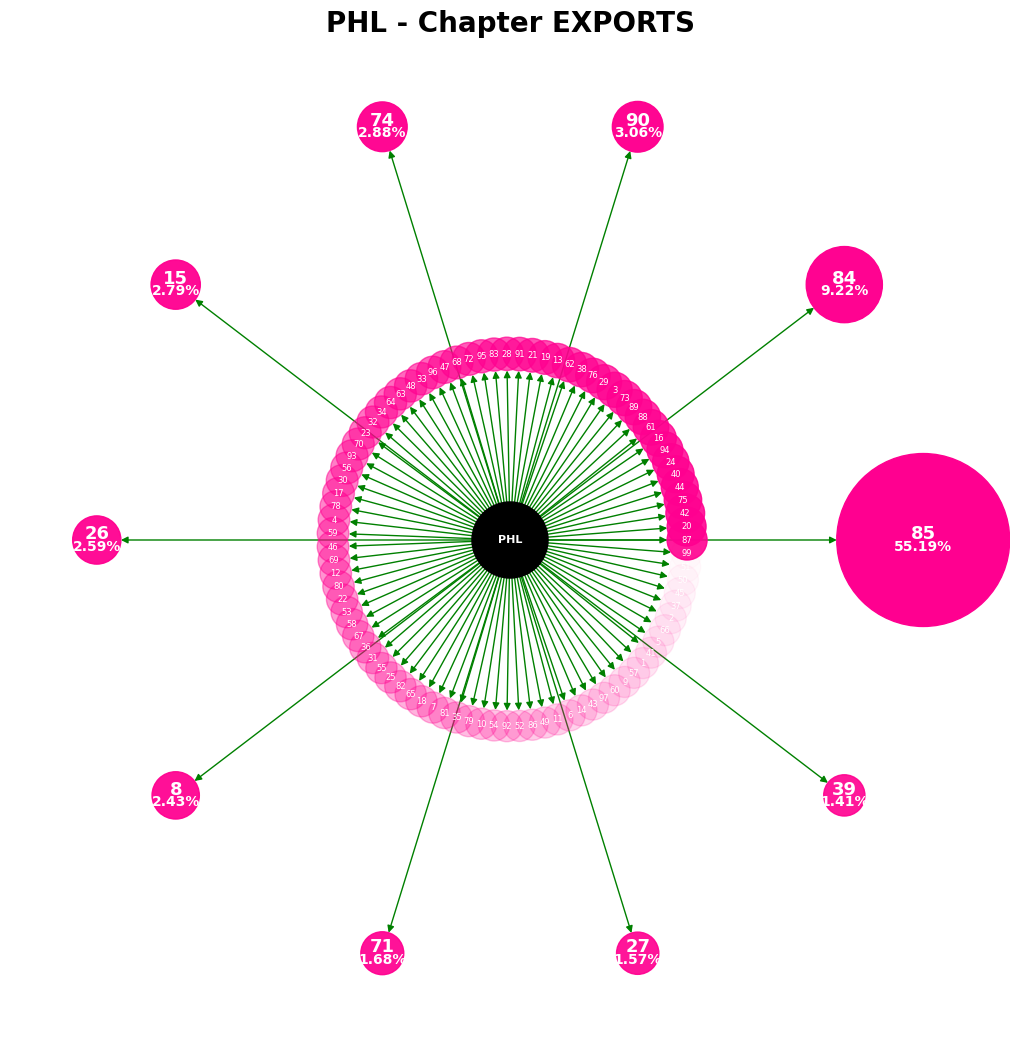

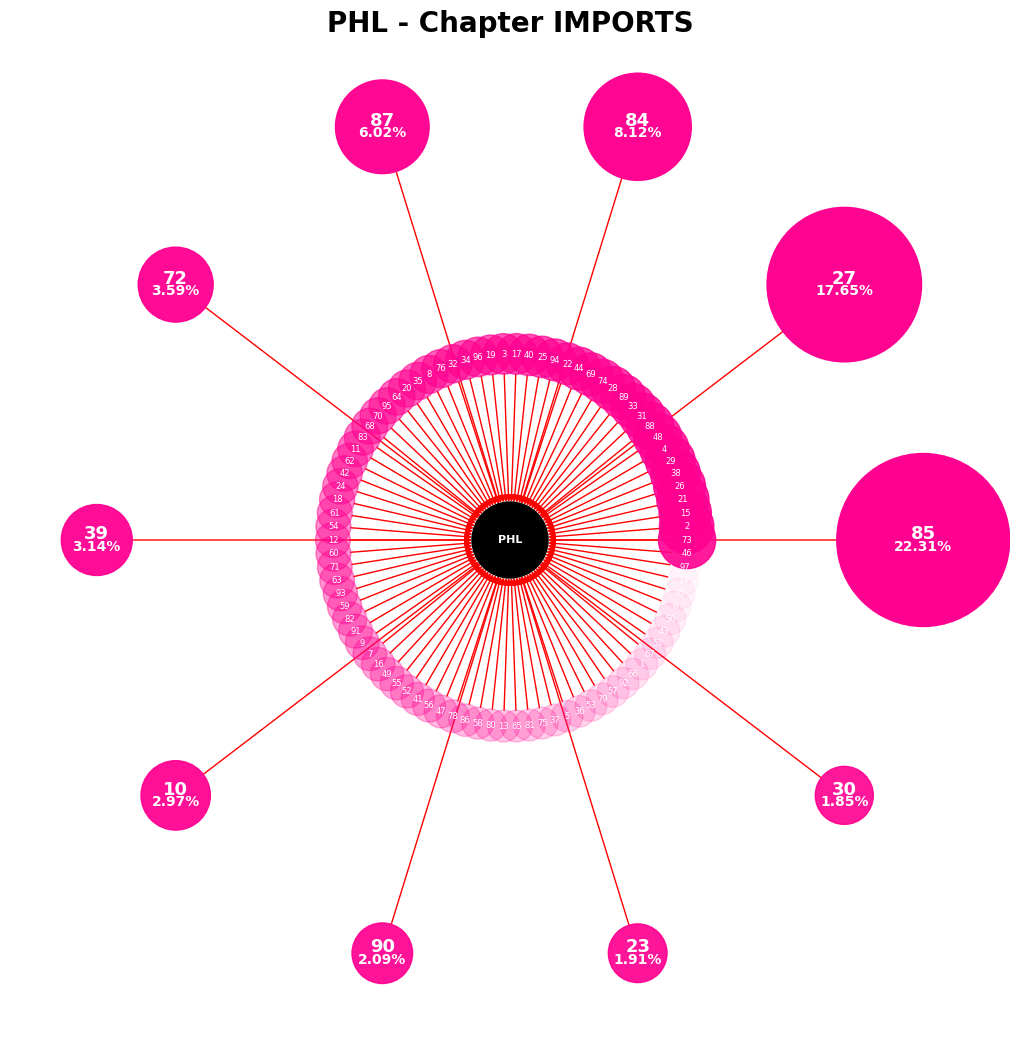

In [26]:
def visualize_bipartite_digraph_chapters(graph, title, flow_desc):
    total_trade_value = df_chapters[df_chapters['FlowDesc'] == flow_desc]['Trade_Value_USD'].sum()

    # Extract top 10 chapters by trade value
    top_10_chapters = df_chapters[df_chapters['FlowDesc'] == flow_desc].nlargest(10, 'Trade_Value_USD')['HSCode'].tolist()
    top_10_values = df_chapters[df_chapters['FlowDesc'] == flow_desc].nlargest(10, 'Trade_Value_USD')['Trade_Value_USD'].tolist()

    # Convert values to percentage over total trade
    top_10_percentage = [(value / total_trade_value) * 100 for value in top_10_values]

    # Fixed positions for top 10 chapters
    fixed_positions = {'PHL': (0, 0)}
    angle = np.linspace(0, 2 * np.pi, len(top_10_chapters) + 1)
    radius_outer = 0.7  # Outer radius for top 10
    radius_inner = 0.3  # Inner radius for other nodes
    
    for idx, chapter in enumerate(top_10_chapters):
        fixed_positions[chapter] = (radius_outer * np.cos(angle[idx]), radius_outer * np.sin(angle[idx]))
    
    # Positioning other nodes (not in top 10) in inner circle
    other_chapters = [node for node in graph.nodes() if node not in top_10_chapters and node != 'PHL']
    angle_inner = np.linspace(0, 2 * np.pi, len(other_chapters) + 1)
    for idx, chapter in enumerate(other_chapters):
        fixed_positions[chapter] = (radius_inner * np.cos(angle_inner[idx]), radius_inner * np.sin(angle_inner[idx]))
    
    fixed_nodes = list(fixed_positions.keys())
    pos = nx.spring_layout(graph, pos=fixed_positions, fixed=fixed_nodes, seed=143, k=0.2)
    
    # Weights for node sizes
    trade_values = [graph[u][v]['weight'] for u, v in graph.edges()]
    max_trade_value = max(trade_values)
    node_sizes = [3000]  # Fixed size for PHL
    node_sizes.extend([500 + 15000 * (value / max_trade_value) for value in trade_values])
    
    # Edge colors
    edge_colors = ['green' if u == 'PHL' else 'red' for u, v in graph.edges()]
    
    # Node colors - Fade in descending order of trade value using alpha
    sorted_trade_values = sorted(trade_values, reverse=False)
    base_color = np.array([255/255, 0/255, 144/255, 1])  # RGB for #ff0090
    node_colors = ['#000000']  # PHL
    for _, _, weight in graph.edges(data='weight'):
        index = sorted_trade_values.index(weight)
        alpha = (index + 1) / len(sorted_trade_values)
        faded_color = tuple(base_color * [1, 1, 1, alpha])
        node_colors.append(faded_color)
    
    # Visualization options
    options = {
        "node_color": node_colors,
        "edge_color": edge_colors,
        "node_size": node_sizes,
        "font_color": 'white',
        "with_labels": False,
        'font_size': 6,
        'font_weight': 'bold',
        'width': 1
    }
    
    # Draw the graph
    plt.figure(figsize=(10, 10))
    nx.draw(graph, pos, **options)
    
    # Add labels with percentage values and HSCode inside the nodes for top 10 chapters
    for idx, chapter in enumerate(top_10_chapters):
        plt.text(pos[chapter][0], pos[chapter][1] + 0.01, f"{chapter}", ha='center', va='center', color='white', fontsize=13, fontweight='bold')
        plt.text(pos[chapter][0], pos[chapter][1] - 0.01, f"{top_10_percentage[idx]:.2f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    # Label other nodes (not in top 10)
    for chapter in other_chapters:
        plt.text(pos[chapter][0], pos[chapter][1], f"{chapter}", ha='center', va='center', color='white', fontsize=6)

    # Always label PHL
    plt.text(pos['PHL'][0], pos['PHL'][1], "PHL", ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    
    plt.title(title, fontdict={'fontsize':20, 'fontweight':'bold'})
    plt.show()

# Visualization for EXPORTS for PHL-Chapter
visualize_bipartite_digraph_chapters(exports_G_chapters, "PHL - Chapter EXPORTS", "Export")

# Visualization for IMPORTS for PHL-Chapter
visualize_bipartite_digraph_chapters(imports_G_chapters, "PHL - Chapter IMPORTS", "Import")


Figure 4 shows that Electrical machinery and equipment (Chapter 85) continue to dominate our main exports which solidifies the Philippines' position as a significant player in the global electronics market. This is an attractive proposition for global tech firms looking for outsourcing or setting up manufacturing hubs. Similarly, the substantial exports under nuclear reactors, machinery, and mechanical appliances (Chapter 84) highlight a robust machinery production ecosystem. Interestingly, while the country boasts rich biodiversity, it's the exports of non-traditional products like copper (Chapter 74) and fats and oils (Chapter 15) that have found significant markets abroad. For entrepreneurs, this opens up avenues to explore value-added products, same, or complementary products from these top product categories, to ensure greater market penetration and diversification.

Figure 5 suggests a growing domestic demand for tech products and perhaps the absence of certain specialized machinery domestically (which could be an opportunity for local entrepreneurs to look into). The high import value of mineral fuels and oils (Chapter 27) and vehicles (Chapter 87) indicates a booming transportation sector, potentially signaling urban expansion or infrastructure development. The substantial import of cereals (Chapter 10) can be an area of concern, reflecting a dependency on foreign sources for basic food staples. This could be an opportunity for agri-entrepreneurs to intensify domestic cereal production, leveraging new-age farming techniques.

Combining the results of Figure 4 and 5 reveals an intriguing scenario. The Philippines exports a considerable amount in electrical machinery and equipment (Chapter 85) while also importing in the same category. This could indicate a sophisticated value chain where basic components are imported, value is added domestically, and then exported as finished or semi-finished products. Such a pattern underscores the importance of the Philippines in the global electronics supply chain. However, the duality in importing and exporting similar products might also hint at potential inefficiencies or gaps in the domestic production capabilities. This insight can be used to implement targeted incentives to attract foreign inventors in the same and complementary industries. Continuing this net export of Chapter 85 can help ensure a more self-reliant and streamlined supply chain, solidifying the country's position in the global market.

In [29]:
import plotly.express as px
import numpy as np

# Filter data to get only the export and import rows related to PHL
exports_df = df.copy()
exports_df = exports_df[exports_df['FlowDesc'] == 'Export']
imports_df = df.copy()
imports_df = imports_df[imports_df['FlowDesc'] == 'Import']

# Group by Chapter to get total trade values
exports_grouped = (exports_df
                   .groupby(['HSCode', 'Chapter'])
                   .sum('Trade_Value_USD')
                   .reset_index()
                   .sort_values(by='Trade_Value_USD', ascending=False)[:20])

# Prepare the data for the treemap
df_tree_exports = exports_grouped[['HSCode', 'Chapter', 'Trade_Value_USD']]
df_tree_exports['TOP'] = np.where(df_tree_exports['Chapter'].isin(exports_grouped.nlargest(10, 'Trade_Value_USD')['Chapter']),
                                  'Part of Top 10', 'Others')

def wrap_text(text, width=30):
    """
    Wrap text with line breaks every specified width of characters.
    """
    return '<br>'.join([text[i:i+width] for i in range(0, len(text), width)])

# Wrap the 'HSCode' column
df_tree_exports['HSCode'] = df_tree_exports['HSCode'].astype('str').apply(wrap_text)

# Identify the top 10 Chapters
top_10_chapters = exports_grouped.nlargest(10, 'Trade_Value_USD')['Chapter'].tolist()

# Wrap and update 'Chapter' for those in top 10; set others to empty string
df_tree_exports['Chapter'] = df_tree_exports.apply(lambda row: wrap_text(row['Chapter']) if row['Chapter'] in top_10_chapters else '', axis=1)

# Plot the treemap for exports by chapter with both 'HSCode' and 'Chapter' in the path
fig_exports = px.treemap(df_tree_exports, path=['HSCode', 'Chapter'],
                         values='Trade_Value_USD', width=1000, height=700,
                         color='TOP',
                         color_discrete_map={'Part of Top 10': "#ff0090", 'Others': 'gray'})
fig_exports.update_layout(title=dict(
                          text='Philippines Exports by Chapter',
                          font=dict(size=20, color="#ff0090")),
                          margin=dict(t=50, l=25, r=25, b=25),
                          uniformtext_minsize=10, uniformtext_mode='show')

fig_exports.update_traces(maxdepth=2, textinfo = "label+percent root")

fig_exports.show()


In [30]:
# Group by Chapter to get total trade values
imports_grouped = (imports_df
                   .groupby(['HSCode', 'Chapter'])
                   .sum('Trade_Value_USD')
                   .reset_index()
                   .sort_values(by='Trade_Value_USD', ascending=False)[:20])

# Prepare the data for the treemap
df_tree_imports = imports_grouped[['HSCode', 'Chapter', 'Trade_Value_USD']]
df_tree_imports['TOP'] = np.where(df_tree_imports['Chapter'].isin(imports_grouped.nlargest(10, 'Trade_Value_USD')['Chapter']),
                                  'Part of Top 10', 'Others')

# Wrap the 'HSCode' column
df_tree_imports['HSCode'] = df_tree_imports['HSCode'].astype('str').apply(wrap_text)

# Identify the top 10 Chapters
top_10_chapters = imports_grouped.nlargest(10, 'Trade_Value_USD')['Chapter'].tolist()

# Wrap and update 'Chapter' for those in top 10; set others to empty string
df_tree_imports['Chapter'] = df_tree_imports.apply(lambda row: wrap_text(row['Chapter']) if row['Chapter'] in top_10_chapters else '', axis=1)

# Plot the treemap for imports by chapter with both 'HSCode' and 'Chapter' in the path
fig_imports = px.treemap(df_tree_imports, path=['HSCode', 'Chapter'],
                         values='Trade_Value_USD', width=1000, height=700,
                         color='TOP',
                         color_discrete_map={'Part of Top 10': "#ff0090", 'Others': 'gray'})
fig_imports.update_layout(title=dict(
                          text='Philippines Imports by Chapter',
                          font=dict(size=20, color="#ff0090")),
                          margin=dict(t=50, l=25, r=25, b=25),
                          uniformtext_minsize=10, uniformtext_mode='show')
fig_imports.update_traces(maxdepth=2, textinfo = "label+percent root")

fig_imports.show()


#### Trade Balance

In [44]:
# Calculate total exports and imports per country
exports_sum = df.copy()
exports_sum = exports_sum[exports_sum['FlowDesc'] == 'Export'].groupby('PartnerDesc')['Trade_Value_USD'].sum()
imports_sum = df.copy()
imports_sum = imports_sum[imports_sum['FlowDesc'] == 'Import'].groupby('PartnerDesc')['Trade_Value_USD'].sum()

# Calculate trade balance (Export - Import)
trade_balance = exports_sum - imports_sum
trade_balance_df = trade_balance.reset_index()
trade_balance_df.columns = ['PartnerDesc', 'Trade_Balance_USD']

In [45]:
trade_bal_top_10 = trade_balance_df.sort_values(by='Trade_Balance_USD', ascending=False).head(10)

In [46]:
trade_bal_bot_10 = trade_balance_df.sort_values(by='Trade_Balance_USD', ascending=True).head(10)

In [234]:
trade_bal_bot_10

PartnerDesc  Trade_Balance_USD
41             China -18,830,506,716.00
97         Indonesia -13,210,004,940.00
161    Rep. of Korea  -9,603,020,465.00
193         Thailand  -4,282,049,258.00
121         Malaysia  -4,236,975,621.00
150  Other Asia, nes  -4,128,976,244.00
178        Singapore  -3,551,752,896.00
215         Viet Nam  -3,051,155,298.00
173     Saudi Arabia  -2,657,003,126.00
11         Australia  -2,574,285,259.00

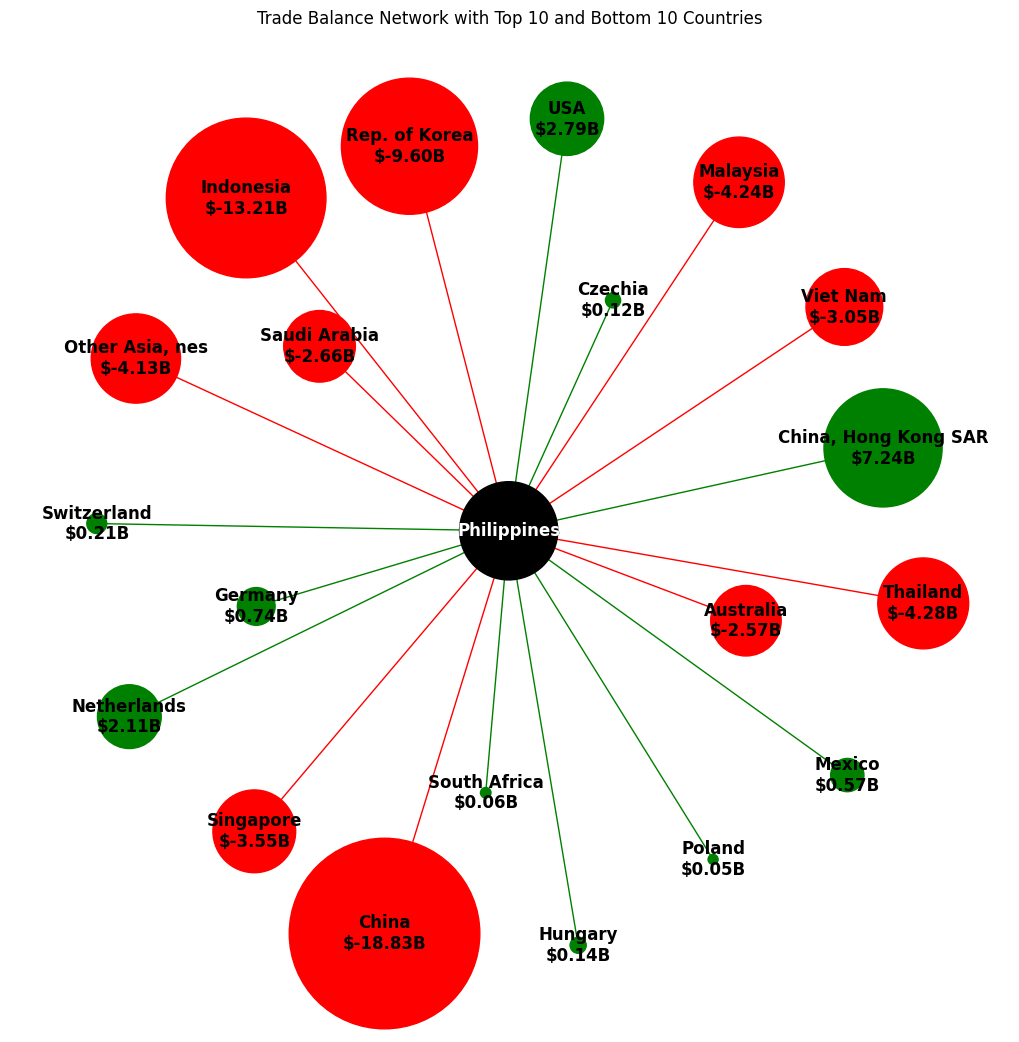

In [49]:
# Create a directed graph
BG = nx.Graph()

# Combine the two DataFrames
combined_df = pd.concat([trade_bal_top_10, trade_bal_bot_10])

# Add nodes and edges
for _, row in combined_df.iterrows():
    country = row['PartnerDesc']
    balance = row['Trade_Balance_USD']
    BG.add_node(country, balance=balance)
    
    if balance > 0:
        BG.add_edge("Philippines", country, color='green')  # green for positive balance
    else:
        BG.add_edge("Philippines", country, color='red')  # red for negative balance

# Calculate node sizes and colors
node_sizes = [5000 if country == "Philippines" else abs(BG.nodes[country]['balance'])/1e6 for country in BG.nodes()]
node_colors = ['green' if ('balance' in BG.nodes[country] and BG.nodes[country]['balance'] > 0) else 
               'red' if ('balance' in BG.nodes[country] and BG.nodes[country]['balance'] < 0) else 
               'black' if country == "Philippines" else 'lightgray' for country in BG.nodes()]

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(BG, k=1, seed=143)  
edges = BG.edges(data=True)


# Add node labels with trade balance information (excluding 'Philippines')
node_labels = {}
for country in BG.nodes():
    if country == "Philippines":
        node_labels[country] = country
    elif 'balance' in BG.nodes[country]:
        trade_balance = BG.nodes[country]['balance'] / 1e9  # Convert balance to billions
        node_labels[country] = f"{country}\n${trade_balance:.2f}B"

nx.draw(BG, pos, with_labels=False, node_size=node_sizes, node_color=node_colors,
        edge_color=[edge[2]['color'] for edge in edges], font_color='black', font_weight='bold', font_size=12)
nx.draw_networkx_labels(BG, pos, labels=node_labels, font_color='black', font_size=12, font_weight='bold')  # Updated font_size

# Always label PHL
plt.text(pos['Philippines'][0], pos['Philippines'][1], "Philippines", 
         ha='center', va='center', color='white', 
         fontsize=12, fontweight='bold')

plt.title("Trade Balance Network with Top 10 and Bottom 10 Countries")
plt.show()

Figure 6 displays that the Philippines exhibits a pronounced trade surplus with regions like China's Hong Kong SAR and the USA, underscoring potential untapped demand for specific Filipino products, especially in gateway markets like the Netherlands, opening European avenues. This is also something that the government can look into in deciding on specific free trade agreements to boost exports to these countries more. On the other hand, significant trade deficits with countries like China and Indonesia highlight potential over-reliance on certain imports. Entrepreneurs should explore opportunities for domestic production of these high-demand imported goods, while simultaneously amplifying exports that resonate with surplus countries. This kind of dual strategy can foster a more balanced trade ecosystem, reduce our trade vulnerabilities, while capitalizing on our strengths.

#### Combined Analysis

In [36]:
# Create treemap for Imports with increased size, text settings, and hover data
fig_imports = px.treemap(imports_df, path=['PartnerDesc', 'HSCode'],
                         values='Trade_Value_USD', title='Imports by Partner Country and Chapter',
                         width=1200, height=1200, hover_data=['Chapter'])
fig_imports.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig_imports.update_traces(textinfo = "label+percent parent+ percent root")
fig_imports.show()

# Create treemap for Exports with increased size, text settings, and hover data
fig_exports = px.treemap(exports_df, path=['PartnerDesc', 'HSCode'],
                         values='Trade_Value_USD', title='Exports by Partner Country and Chapter',
                         width=1200, height=1200, hover_data=['Chapter'])
fig_exports.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig_exports.update_traces(textinfo = "label+percent parent+ percent root")
fig_exports.show()

Figure 7 reveals several strategic insights. Key Asian economies, especially China and Indonesia, dominate the import landscape, primarily in machinery (Chapter 85) and fuels (Chapter 27). These two Chapters are diversely sourced across several partners (great!). Diversifying fuel imports could offer the Philippines a buffer against geopolitical or economic fluctuations in a given country. Also, the prominence of electrical machinery, vehicles, and fuels in the import matrix indicates areas where domestic advancements or alternative sourcing could significantly benefit the nation’s economic health and resilience.

Analyzing the Philippines’ exports by country and chapter in Figure 8 also presents a strategic opportunity. The USA, Japan, and Hong Kong are predominant export destinations, with electrical machinery and equipment being a standout category. Interestingly, while the Philippines exports a vast amount of this category to the USA and Hong Kong, there’s a notable diversification with Japan, hinting at a broader trade relationship. Also, the presence of natural pearls and precious stones in the export mix, particularly to Hong Kong, suggests a niche market that may be further cultivated. Enhancing these sectors through innovation and quality assurance, coupled with exploring new markets for these products, could amplify the Philippines’ competitive edge in the global arena.

In [206]:
# Create treemap for Imports with increased size, text settings, and hover data
fig_imports = px.treemap(imports_df, path=['HSCode', 'PartnerDesc'],
                         values='Trade_Value_USD', title='Imports by Chapter and Partner Country',
                         width=1500, height=1500, hover_data=['PartnerDesc'])
fig_imports.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig_imports.update_traces(textinfo = "label+percent parent+ percent root")
fig_imports.show()

# Create treemap for Exports with increased size, text settings, and hover data
fig_exports = px.treemap(exports_df, path=['HSCode', 'PartnerDesc'],
                         values='Trade_Value_USD', title='Exports by Chapter and Partner Country',
                         width=1500, height=1500, hover_data=['PartnerDesc'])
fig_exports.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig_exports.update_traces(textinfo = "label+percent parent+ percent root")
fig_exports.show()


Upon inspecting the Philippines’ imports by chapter and country in Figure 9, it’s obvious that China is a dominant trade partner, with significant imports spanning across electrical machinery, nuclear reactors, and mineral fuels. However, a closer look reveals the Philippines’ reliance on Indonesia for mineral fuels, hinting at the strategic importance of maintaining this relationship for energy security. Moreover, the diversification in imports from the USA, spanning machinery to pharmaceuticals, showcases a balanced trade relationship. Given the variety of essential goods coming from different countries, it’s imperative for the Philippines to diversify its supply chains and foster resilient partnerships, ensuring a steady flow of critical imports.

Figure 10 demonstrates that electrical machinery remains the dominant export, especially to the USA, Hong Kong, and Japan. Yet, what’s intriguing is the broad spread of product categories exported to countries like Japan — from machinery to natural pearls. This diversified export portfolio suggests a mature trading relationship, offering stability and reduced vulnerability to market fluctuations. Another notable observation is the export of ores and copper to countries like China, revealing potential growth sectors that could be further developed. Strategic efforts to innovate and expand production in these sectors could potentially elevate the Philippines’ export value and strengthen its position in the global market.

In [37]:
# Create treemap with PartnerDesc as first level and Import/Export as second level
fig = px.treemap(df, path=['PartnerDesc', 'FlowDesc'],
                 values='Trade_Value_USD', title='Trade by Partner Country and Flow',
                 width=1200, height=1200, hover_data=['Trade_Value_USD'],
                 custom_data=[df['Trade_Value_USD']])
# fig.update_traces(texttemplate='%{label}<br>Trade Value: $%{customdata[0]:,.0f}')
fig.update_traces(textinfo = "label+percent parent+ percent root")

fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [38]:
# Create treemap with PartnerDesc as first level and Import/Export as second level
fig = px.treemap(df, path=['HSCode', 'FlowDesc'],
                 values='Trade_Value_USD', title='Trade by HS Code and Flow',
                 width=1200, height=1200, hover_data=['Trade_Value_USD'],
                 custom_data=[df['Trade_Value_USD']])

fig.update_traces(textinfo = "label+percent parent+ percent root")
# texttemplate='%{label}<br>Trade Value: $%{customdata[0]:,.0f}',
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

--- 
<a id='Conclusion'></a>
<h1 style="color:#0494fc; background-color:#ffe6f4; border: 1px solid #ffffff; padding: 10px 0;">CONCLUSION</h1>

And with that, by analyzing the relationships using nodes and edges in our Trade Network, we were able to gather and summarize the following useful insights:

For the Government:
While China remains a significant trade partner, the imbalance in trade necessitates diversifying partners to mitigate risks. Strengthening ties with countries like the Netherlands and Germany via strategic free trade agreements, foreign incentives, etc., could be beneficial.
The prominence of ores, copper, and electrical machinery in our exports suggests potential growth sectors. Investing in R&D and infrastructure in these sectors can elevate the Philippines’ global standing.

For NGOs:
With certain product categories like machinery and natural pearls being exported to diverse markets, NGOs can focus on grassroots-level initiatives to enhance local production capabilities.
Provide skill training in sectors that are emerging as significant export players, ensuring the workforce is equipped to meet global demands.

For Entrepreneurs:
The broad product spread in exports to countries like Japan suggests a market open to diverse products. Entrepreneurs should tap into this versatility.
With countries like China importing ores and copper, there’s room for innovation. Collaborative efforts to refine these raw materials locally can add value and increase export potential.

For Others:
As the landscape of Filipino trade evolves, staying abreast of trends and shifts is crucial. This not only aids in strategic decision-making but also in spotting opportunities as they arise.
Network science has shown the importance of connections. Building bridges, both within and outside the country, can lead to collaborative opportunities and shared growth.
Thank you for joining me in this exploration of the Philippines’ 2022 trade network. Stay tuned!

--- 
<a id='REFERENCES'></a>
<h1 style="color:#0494fc; background-color:#ffe6f4; border: 1px solid #ffffff; padding: 10px 0;">REFERENCES</h1>

- United Nations Comtrade Database. Comtradeplus. A primary source for global trade data, offering detailed insights into trade flows and patterns.
- Tariff Commission of the Philippines. HS Codes and the Philippine Tariff Book. A detailed guide on the Harmonized System codes used for classifying traded goods on an international scale.